In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

In [2]:
Data=pd.read_csv('../input/motorcycle-dataset/BIKE DETAILS.csv')

In [3]:
print(len(Data))
Data.head(15)

1061


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [4]:
Data.isnull()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False
1058,False,False,False,False,False,False,False
1059,False,False,False,False,False,False,False


In [5]:
Data.isnull().any().any()

True

In [6]:
Data['ex_showroom_price'].isnull().sum().sum()

435

In [7]:
Data.dropna(inplace=True)
Data.reset_index(drop=True, inplace=True)

In [8]:
Data['owner'] = Data['owner'].map({'1st owner':1, '2nd owner':2, '3rd owner':3, '4th owner':4})
Data.head(100)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
2,Honda CB Twister,18000,2010,Individual,1,60000,53857.0
3,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0
4,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0
...,...,...,...,...,...,...,...
95,Bajaj Discover 125,15000,2011,Individual,1,32000,57549.0
96,Yamaha SZ RR V 2.0,35000,2015,Individual,1,38000,69983.0
97,Bajaj Discover 150,25000,2014,Individual,2,71000,54299.0
98,Vespa VX 125,45000,2013,Individual,2,50000,72303.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

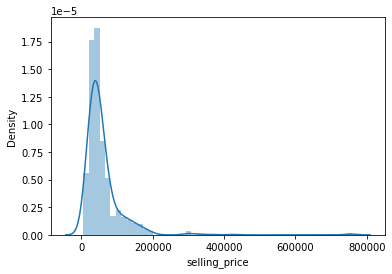

In [9]:
sns.distplot(Data['selling_price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

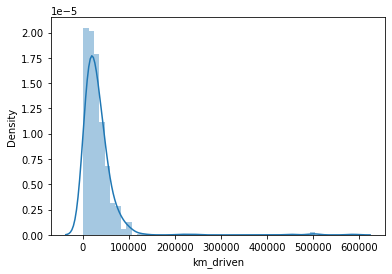

In [10]:
sns.distplot(Data['km_driven'])

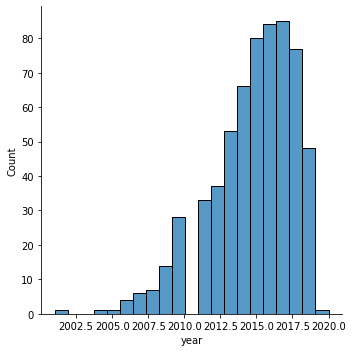

In [11]:
sns.displot(Data['year'])

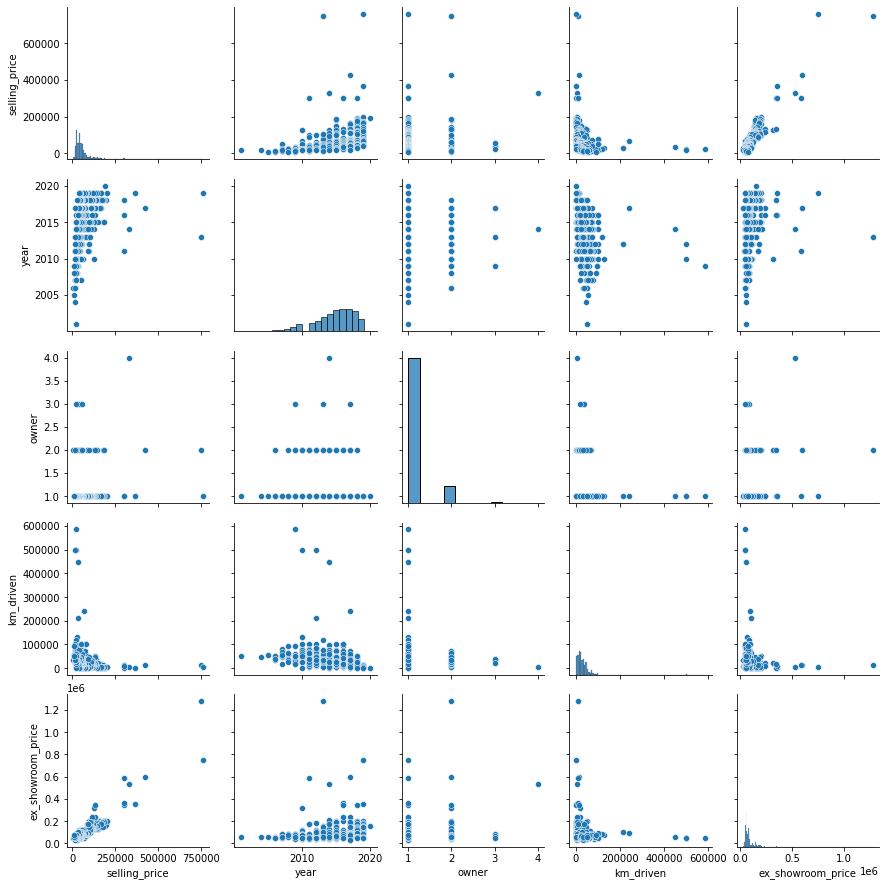

In [12]:
sns.pairplot(Data)

<AxesSubplot:>

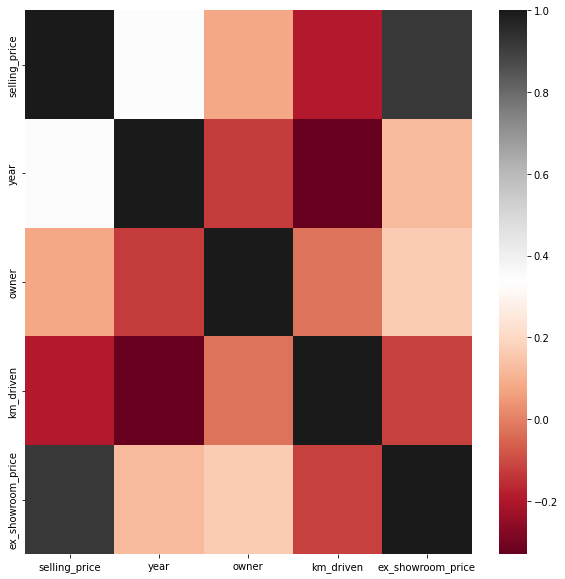

In [13]:
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(Data.corr(), cmap = 'RdGy')

In [14]:
x=np.array(Data[['selling_price','year','owner','km_driven']]).reshape(-1,4)
y=np.array(Data['ex_showroom_price']).reshape(-1,1)

In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)
y = preprocessing.StandardScaler().fit(y).transform(y)
print(X[:5])
print(y[:5])

[[ 1.51286591  1.06073591 -0.33938041 -0.45488702]
 [ 0.09280257  0.0661967  -0.33938041 -0.21282724]
 [-0.69240893 -1.59136865 -0.33938041  0.60137382]
 [ 0.31834204  1.06073591 -0.33938041 -0.34485985]
 [-0.15779685  0.39770977 -0.33938041  0.205276  ]]
[[ 0.77685216]
 [ 0.02175106]
 [-0.44039339]
 [-0.00309569]
 [-0.35948647]]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit (X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred[0:5])

[[-0.31518287]
 [-0.10713855]
 [-0.35656317]
 [-0.44442884]
 [-0.19448633]]


In [18]:
print('Độ dốc:',model.coef_)
print('Hệ Số Chặn:',model.intercept_)

Độ dốc: [[ 0.86809149 -0.17503471  0.0302272  -0.00392244]]
Hệ Số Chặn: [-0.0073154]


In [19]:
print('R2:',model.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.8638893124587306
MAE: 0.203016885442804
MSE: 0.27115724019629267
RMSE: 0.5207276065240758
